<a href="https://colab.research.google.com/github/Pablo123456678/Tarea-FEST/blob/main/CodigoPunto3FEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

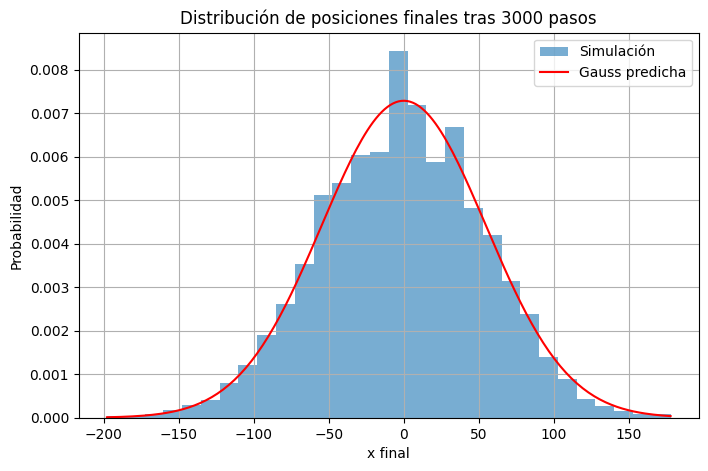

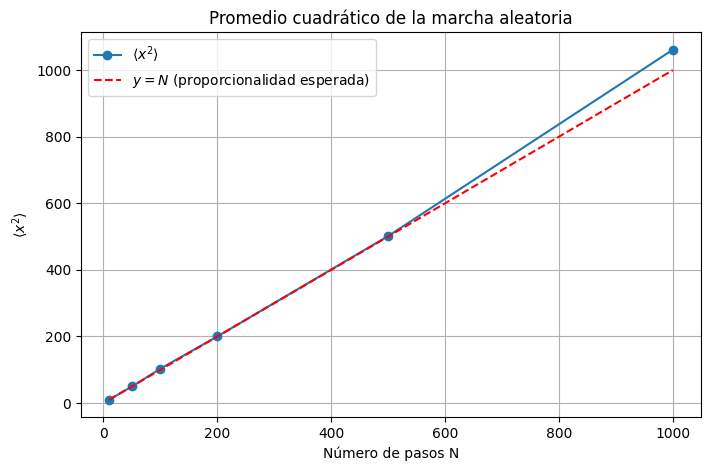

Estimaciones de la constante de difusión D:
N=10: D ≈ 0.511
N=50: D ≈ 0.497
N=100: D ≈ 0.517
N=200: D ≈ 0.500
N=500: D ≈ 0.502
N=1000: D ≈ 0.531


In [1]:
# Simulación numérica de la marcha aleatoria en 1D
#Nombre: Juan Pablo Puentes Bayona
#Código: 202310155
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def marcha_aleatoria(N, n_veces=1000):
    """
    Simula una marcha aleatoria.
    Parámetros
    ----------
    N :
        Número de pasos en cada caminata.
    n_veces :
        Número de veces que se repite la simulación.
    Retorna
    -------
    posiciones_finales : np.array
        Arreglo con las posiciones finales de cada caminata.
    trayectorias : np.array
    """
    pasos = np.random.choice([-1, 1], size=(n_runs, N))  # pasos ±1
    trayectorias = np.cumsum(pasos, axis=1)              # posiciones acumuladas
    posiciones_finales = trayectorias[:, -1]             # posición final
    return posiciones_finales, trayectorias

# -------- PUNTO 7 --------
N = 3000  # número de pasos
n_runs = 5000  # cantidad de caminatas
pos_finales, trayectorias = marcha_aleatoria(N, n_runs)

# Histograma de posiciones finales
plt.figure(figsize=(8,5))
plt.hist(pos_finales, bins=30, density=True, alpha=0.6, label="Simulación")

# Ajuste gaussiano predicho por el TCL
mu, sigma = 0, np.sqrt(N)
x = np.linspace(min(pos_finales), max(pos_finales), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="Gauss predicha")

plt.title(f"Distribución de posiciones finales tras {N} pasos")
plt.xlabel("x final")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# -------- PUNTO 8 --------
def promedio_cuadratico(N_values, n_runs=5000):
    """
    Calcula <x> y <x^2> para distintos valores de N.
    Parámetros
    ----------
    N_values : list
        Lista de valores de N (número de pasos).
    n_runs : int
        Número de repeticiones de cada simulación.
    Retorna
    -------
    resultados : dict
        Diccionario con <x>, <x^2> para cada N.
    """
    resultados = {"N": [], "x_mean": [], "x2_mean": []}
    for N in N_values:
        pos_finales, _ = marcha_aleatoria(N, n_runs)
        resultados["N"].append(N)
        resultados["x_mean"].append(np.mean(pos_finales))
        resultados["x2_mean"].append(np.mean(pos_finales**2))
    return resultados

# Valores de N a probar
N_values = [10, 50, 100, 200, 500, 1000]
res = promedio_cuadratico(N_values)

# Graficar <x^2> contra N
plt.figure(figsize=(8,5))
plt.plot(res["N"], res["x2_mean"], 'o-', label=r"$\langle x^2 \rangle$")
plt.plot(res["N"], res["N"], 'r--', label=r"$y=N$ (proporcionalidad esperada)")
plt.title("Promedio cuadrático de la marcha aleatoria")
plt.xlabel("Número de pasos N")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.legend()
plt.grid(True)
plt.show()

# Estimación de la constante de difusión D
# Para una caminata aleatoria en 1D: <x^2> = 2 D t
# Aquí t = N, entonces D = <x^2> / (2N)
D_estimado = [res["x2_mean"][i]/(2*res["N"][i]) for i in range(len(N_values))]
print("Estimaciones de la constante de difusión D:")
for N, D in zip(N_values, D_estimado):
    print(f"N={N}: D ≈ {D:.3f}")
